In [1]:
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras import activations


#from keras import callbacks
#from keras import metrics
#from keras import backend as K


#import os
import time
from datetime import timedelta
#import matplotlib.pyplot as plt
#import numpy as np

#from tqdm import tqdm

#import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
from os import walk

from util_functions import *

In [18]:
DATA_PATH = "../../Data/"

IMAGES_PATH_SEPARATED = DATA_PATH+"HAM10000_images_separated_colored_HSV/"
IMAGES_PATH_VALIDATION = DATA_PATH+"HAM10000_images_separated_validation/"

IMG_SIZE = (224, 224) # original image size

In [3]:
#SAVING_ON = True

## Activation Function Choise

https://towardsdatascience.com/how-to-choose-the-right-activation-function-for-neural-networks-3941ff0e6f9c

For CNN developed, 3 major activation functions were taken into consideration: swish, relu and softmax.

Relu function does not have the vanishing gradient problem, computationaly inexpensive, faster convergence. 

In [41]:
#learning_rate = 0.00025
#decay_rate = 0.2 # 10%


In [19]:
# COPY
epochs = 10

batch_size = 64
validation_split = 0.2

generator = ImageDataGenerator(validation_split=validation_split)
train_data = generator.flow_from_directory( 
        subset="training",
        directory=IMAGES_PATH_SEPARATED,
        target_size=IMG_SIZE,
        batch_size=batch_size
)
test_data = generator.flow_from_directory( 
        subset="validation",
        directory=IMAGES_PATH_SEPARATED,
        target_size=IMG_SIZE,
        batch_size=batch_size,
        shuffle=False
)

Found 17143 images belonging to 7 classes.
Found 4282 images belonging to 7 classes.


## COLOR RGB

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)       

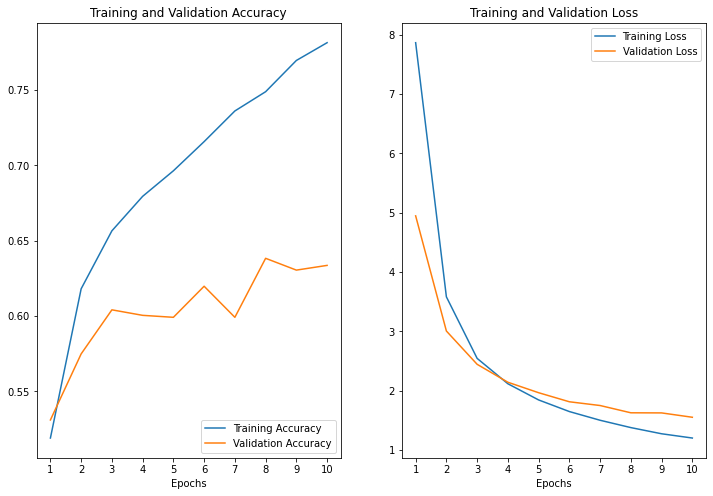

Time Elapsed :  0:34:07.871066


In [17]:
start_time = time.time()


model = compile_model(img_size=IMG_SIZE)
model.summary()
fit_model(model, train_data, test_data, epochs, verbose=True, 
          augment="color_rgb_{0}".format(epochs))
'''''';
print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

# STANDARD RGB

In [21]:
model_loaded = keras.models.load_model(
        "output\keras_models\skin_classifier_10_color_rgb_10.keras",
        custom_objects={"mish": mish}
    )

Top 1 accuracy : 0.3517
Top 2 accuracy : 0.5138
Top 3 accuracy : 0.6058
Top 4 accuracy : 0.6971
Top 5 accuracy : 0.8375
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6667


,precision,recall,specificity,f1-score,support
label,,,,,
akiec,0.0000,0.0000,0.9985,0.0000,33
bcc,0.0000,0.0000,1.0000,0.0000,52
bkl,0.0000,0.0000,1.0000,0.0000,110
df,0.0000,0.0000,0.9955,0.0000,12
mel,0.0000,0.0000,1.0000,0.0000,112
nv,0.6693,0.9985,0.0000,0.8014,671
vasc,0.0000,0.0000,1.0000,0.0000,15


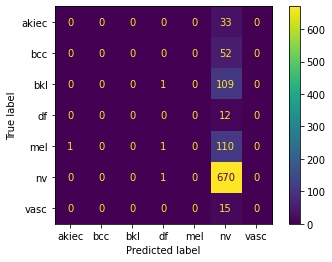

In [22]:
print_top_k_accuracy(model_loaded, test_data)
cm = print_confusion_matrix(model_loaded, IMAGES_PATH_VALIDATION)
cm

In [23]:
cm.mean()[0:4]

precision      0.095614
recall         0.142643
specificity    0.856286
f1-score       0.114486
dtype: float64

## COLOR HSV

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 64)       

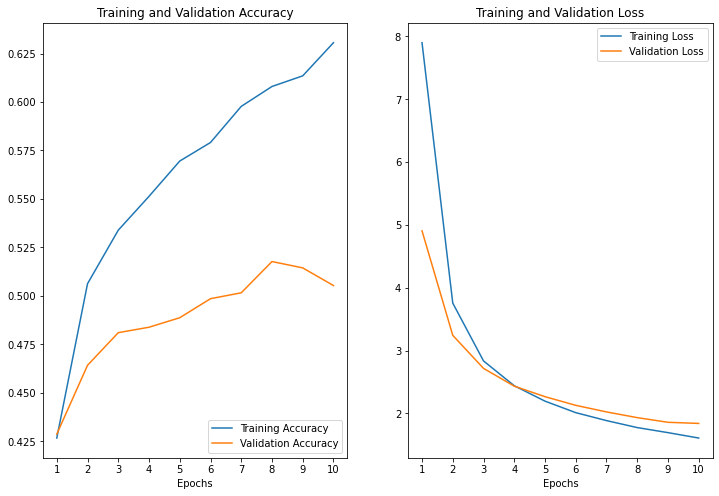

Time Elapsed :  0:38:03.181774


In [20]:
start_time = time.time()


model = compile_model(img_size=IMG_SIZE)
model.summary()
fit_model(model, train_data, test_data, epochs, verbose=True, 
          augment="color_hsv_{0}".format(epochs))
'''''';
print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

# STANDARD HSV

In [24]:
model_loaded = keras.models.load_model(
        "output\keras_models\skin_classifier_10_color_hsv_10.keras",
        custom_objects={"mish": mish}
    )

Top 1 accuracy : 0.5054
Top 2 accuracy : 0.7373
Top 3 accuracy : 0.8599
Top 4 accuracy : 0.9267
Top 5 accuracy : 0.9741
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6667


,precision,recall,specificity,f1-score,support
label,,,,,
akiec,0.0000,0.0000,0.9985,0.0,33
bcc,0.0000,0.0000,1.0000,0.0,52
bkl,0.0000,0.0000,1.0000,0.0,110
df,0.0000,0.0000,1.0000,0.0,12
mel,0.0000,0.0000,1.0000,0.0,112
nv,0.6673,0.9985,0.0000,0.8,671
vasc,0.0000,0.0000,1.0000,0.0,15


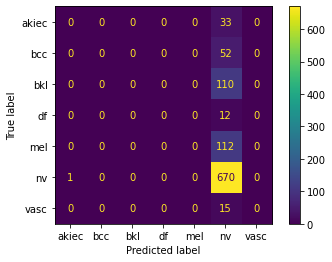

In [25]:
print_top_k_accuracy(model_loaded, test_data)
cm = print_confusion_matrix(model_loaded, IMAGES_PATH_VALIDATION)
cm

In [26]:
cm.mean()[0:4]

precision      0.095329
recall         0.142643
specificity    0.856929
f1-score       0.114286
dtype: float64

### CROP FLIP

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        1

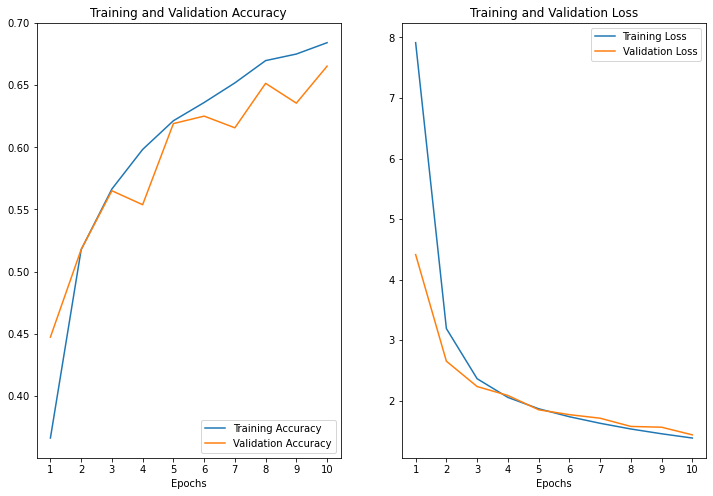

Time Elapsed :  0:34:54.239346


In [5]:
start_time = time.time()


model = compile_model(img_size=IMG_SIZE)
model.summary()
fit_model(model, train_data, test_data, epochs, verbose=True, 
          augment="crop_flip_{0}".format(epochs))
'''''';
print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

# STANDARD CROP FLIP

In [9]:
model_loaded = keras.models.load_model(
        "output\keras_models\skin_classifier_10_crop_flip_10.keras",
        custom_objects={"mish": mish}
    )

Top 1 accuracy : 0.3982
Top 2 accuracy : 0.6441
Top 3 accuracy : 0.795
Top 4 accuracy : 0.8807
Top 5 accuracy : 0.9441
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.6637


,precision,recall,specificity,f1-score,support
label,,,,,
akiec,0.1667,0.1818,0.9566,0.1739,33
bcc,0.5192,0.5192,0.9624,0.5192,52
bkl,0.7027,0.2364,0.9831,0.3537,110
df,0.0667,0.2500,0.9405,0.1053,12
mel,0.2273,0.0893,0.9508,0.1282,112
nv,0.7776,0.8808,0.3102,0.8260,671
vasc,0.1290,0.2667,0.9609,0.1739,15


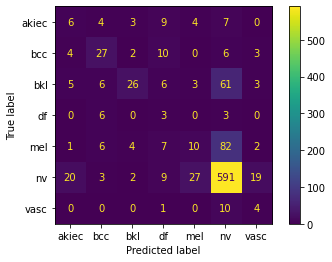

In [10]:
print_top_k_accuracy(model_loaded, test_data)
cm = print_confusion_matrix(model_loaded, IMAGES_PATH_VALIDATION)
cm

In [11]:
cm.mean()[0:4]

precision      0.369886
recall         0.346314
specificity    0.866357
f1-score       0.325743
dtype: float64

### ZOOM

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)       

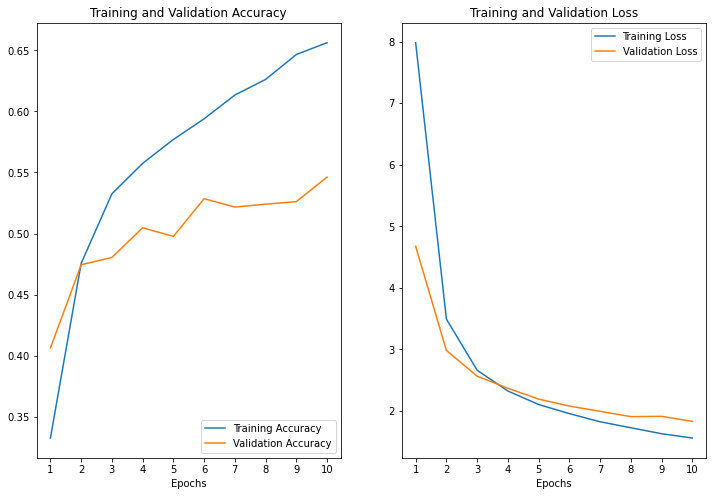

Time Elapsed :  0:33:01.250324


In [8]:
start_time = time.time()


model = compile_model(img_size=IMG_SIZE)
model.summary()
fit_model(model, train_data, test_data, epochs, verbose=True, 
          augment="zoom_{0}".format(epochs))
'''''';
print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

# STANDARD ZOOM

In [12]:
model_loaded = keras.models.load_model(
        "output\keras_models\skin_classifier_10_zoom_10.keras",
        custom_objects={"mish": mish}
    )

Top 1 accuracy : 0.5462
Top 2 accuracy : 0.7488
Top 3 accuracy : 0.8723
Top 4 accuracy : 0.9342
Top 5 accuracy : 0.9648
Found 1005 images belonging to 7 classes.
Accuracy Score :  0.591


,precision,recall,specificity,f1-score,support
label,,,,,
akiec,0.1765,0.4545,0.8921,0.2542,33
bcc,0.3000,0.5769,0.8896,0.3947,52
bkl,0.5405,0.5455,0.9128,0.5430,110
df,0.0000,0.0000,0.9384,0.0000,12
mel,0.2286,0.1429,0.9146,0.1758,112
nv,0.8719,0.6900,0.6583,0.7704,671
vasc,0.1449,0.6667,0.9082,0.2381,15


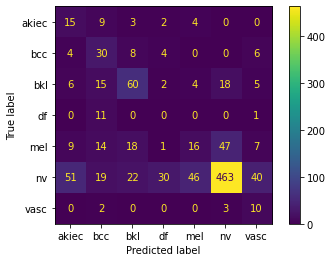

In [13]:
print_top_k_accuracy(model_loaded, test_data)
cm = print_confusion_matrix(model_loaded, IMAGES_PATH_VALIDATION)
cm

In [14]:
cm.mean()[0:4]

precision      0.323200
recall         0.439500
specificity    0.873429
f1-score       0.339457
dtype: float64

## Top K Accuracy

In [5]:
if True:
    model_loaded = keras.models.load_model(
        "output\keras_models\skin_classifier_VGG16_10.keras",
        custom_objects={"mish": mish}
    )
    
    print_top_k_accuracy(model_loaded, test_data)

Top 1 accuracy : 0.224
Top 2 accuracy : 0.4531
Top 3 accuracy : 0.5781
Top 4 accuracy : 0.6667
Top 5 accuracy : 0.7656


Found 1005 images belonging to 7 classes.
Accuracy Score :  0.1692


,precision,recall,specificity,f1-score,support
label,,,,,
akiec,0.0000,0.0000,1.0000,0.0000,33
bcc,0.3333,0.0577,0.9653,0.0984,52
bkl,0.1093,0.8000,0.1026,0.1923,110
df,0.0000,0.0000,0.9392,0.0000,12
mel,0.6452,0.1786,0.9317,0.2797,112
nv,0.9423,0.0730,0.9758,0.1355,671
vasc,0.1031,0.6667,0.6478,0.1786,15


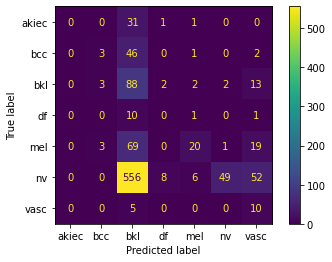

In [11]:
cm = print_confusion_matrix(model_loaded, IMAGES_PATH_VALIDATION)
cm

In [16]:
cm.mean()[0:4]

precision      0.304743
recall         0.253714
specificity    0.794629
f1-score       0.126357
dtype: float64

## TEST THRESHOLDED

Found 15284 images belonging to 7 classes.
Found 3819 images belonging to 7 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                   

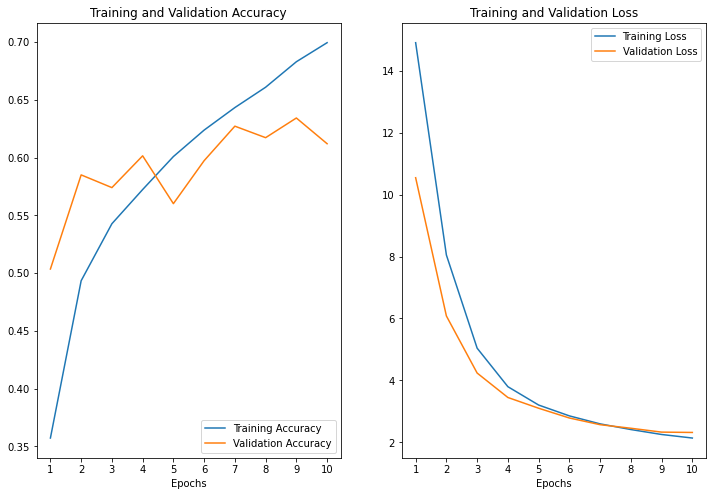

Time Elapsed :  0:33:27.597244


In [10]:
# COPY
epochs = 10

batch_size = 64
validation_split = 0.2

generator = ImageDataGenerator(validation_split=validation_split)
train_data = generator.flow_from_directory( 
        subset="training",
        directory=IMAGES_PATH_SEPARATED,
        target_size=IMG_SIZE,
        batch_size=batch_size
)
test_data = generator.flow_from_directory( 
        subset="validation",
        directory=IMAGES_PATH_SEPARATED,
        target_size=IMG_SIZE,
        batch_size=batch_size
)
start_time = time.time()


model = compile_model(img_size=IMG_SIZE)
model.summary()
fit_model(model, train_data, test_data, epochs, verbose=True, 
          augment="TEST_{0}".format(epochs))
'''''';
print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

# STANDARD THRESHOLD 

## TEST Grayscale

Found 17747 images belonging to 7 classes.
Found 4433 images belonging to 7 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                   

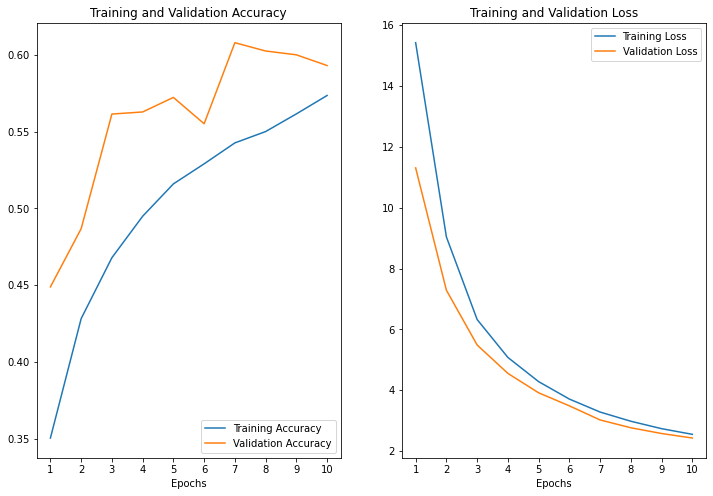

Time Elapsed :  0:39:00.006427


In [7]:
# COPY
epochs = 10

batch_size = 64
validation_split = 0.2

generator = ImageDataGenerator(validation_split=validation_split)
train_data = generator.flow_from_directory( 
        subset="training",
        directory=IMAGES_PATH_SEPARATED,
        target_size=IMG_SIZE,
        batch_size=batch_size
)
test_data = generator.flow_from_directory( 
        subset="validation",
        directory=IMAGES_PATH_SEPARATED,
        target_size=IMG_SIZE,
        batch_size=batch_size
)
start_time = time.time()


model = compile_model(img_size=IMG_SIZE)
model.summary()
fit_model(model, train_data, test_data, epochs, verbose=True, 
          augment="TEST_{0}".format(epochs))
'''''';
print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

# 

Found 781 images belonging to 7 classes.
Found 192 images belonging to 7 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 299, 299, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 297, 297, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 148, 148, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                      

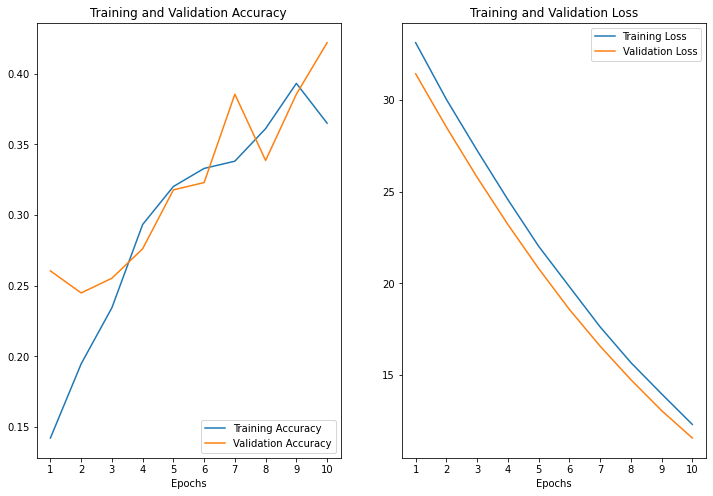

Time Elapsed :  0:03:14.174029


In [22]:
# 16-32-64-128 Shrinked-Balanced

In [ ]:
# keras.callbacks.LearningRateScheduler
# kernel initializer as param

## KFold
 Deprecated, better approach used:
 - flow_from_dataframe and flow_from_directory instead of image_dataset_from_directory allows to use way less RAM and allows bigger batch size without stalling the whole system
 - it was decided to leave this code here as it has produced models and statistics used in research

Found 9013 files belonging to 7 classes.


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

 --- KFold Iteration 1 --- 
Epoch 1/150
226/226 [==============================] - 81s 339ms/step - loss: 2.6297 - accuracy: 0.6548 - val_loss: 2.4236 - val_accuracy: 0.7031
Epoch 2/150
226/226 [==============================] - 77s 325ms/step - loss: 2.5051 - accuracy: 0.6816 - val_loss: 2.3729 - val_accuracy: 0.7115
Epoch 3/150
226/226 [==============================] - 77s 326ms/step - loss: 2.4455 - accuracy: 0.6845 - val_loss: 2.3412 - val_accuracy: 0.7076
Epoch 4/150
226/226 [==============================] - 77s 326ms/step - loss: 2.3995 - accuracy: 0.6909 - val_loss: 2.2894 - val_accuracy: 0.7249
Epoch 5/150
226/226 [==============================] - 77s 325ms/step - loss: 2.3633 - accuracy: 0.7035 - val_loss: 2.2594 - val_accuracy: 0.7260
Epoch 6/150
226/226 [==============================] - 77s 326ms/step - loss: 2.3280 - accuracy: 0.7045 - val_loss: 2.2419 - val_accuracy: 0.7238
Epoch 7/150
226/226 [==============================] - 77s 324ms/step - loss: 2.2952 - accuracy:

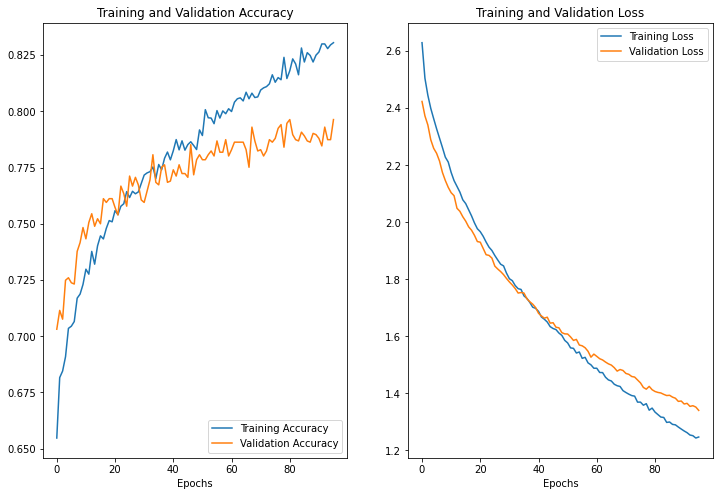

 20%|███████████████▌                                                              | 1/5 [2:05:29<8:21:58, 7529.56s/it]

 --- KFold Iteration 2 --- 
Epoch 1/150
226/226 [==============================] - 83s 363ms/step - loss: 2.6337 - accuracy: 0.6541 - val_loss: 2.4492 - val_accuracy: 0.7009
Epoch 2/150
226/226 [==============================] - 82s 361ms/step - loss: 2.4966 - accuracy: 0.6816 - val_loss: 2.3824 - val_accuracy: 0.7093
Epoch 3/150
226/226 [==============================] - 82s 361ms/step - loss: 2.4384 - accuracy: 0.6872 - val_loss: 2.3268 - val_accuracy: 0.7182
Epoch 4/150
226/226 [==============================] - 82s 361ms/step - loss: 2.3821 - accuracy: 0.7010 - val_loss: 2.2915 - val_accuracy: 0.7282
Epoch 5/150
226/226 [==============================] - 82s 362ms/step - loss: 2.3466 - accuracy: 0.7068 - val_loss: 2.2561 - val_accuracy: 0.7333
Epoch 6/150
226/226 [==============================] - 82s 361ms/step - loss: 2.3139 - accuracy: 0.7160 - val_loss: 2.2251 - val_accuracy: 0.7539
Epoch 7/150
226/226 [==============================] - 82s 361ms/step - loss: 2.2676 - accuracy:

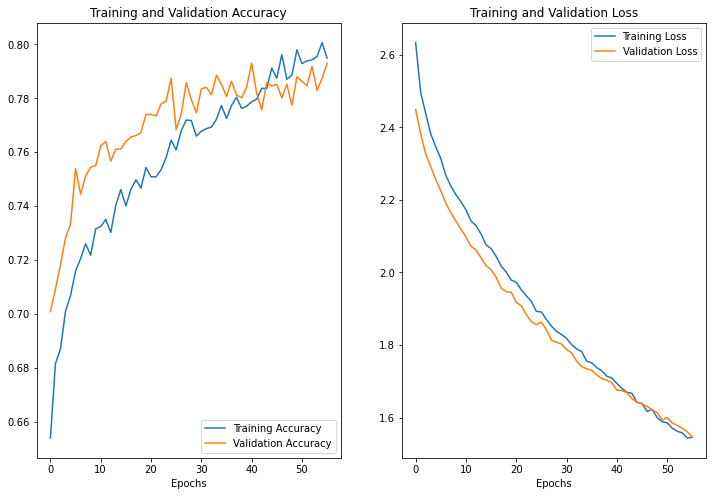

 40%|███████████████████████████████▏                                              | 2/5 [3:23:19<4:52:23, 5847.72s/it]

 --- KFold Iteration 3 --- 
Epoch 1/150
226/226 [==============================] - 89s 390ms/step - loss: 2.6440 - accuracy: 0.6606 - val_loss: 2.4947 - val_accuracy: 0.6802
Epoch 2/150
226/226 [==============================] - 88s 389ms/step - loss: 2.5289 - accuracy: 0.6753 - val_loss: 2.4263 - val_accuracy: 0.6914
Epoch 3/150
226/226 [==============================] - 88s 390ms/step - loss: 2.4720 - accuracy: 0.6863 - val_loss: 2.3992 - val_accuracy: 0.6897
Epoch 4/150
226/226 [==============================] - 88s 390ms/step - loss: 2.4250 - accuracy: 0.6901 - val_loss: 2.3361 - val_accuracy: 0.7031
Epoch 5/150
226/226 [==============================] - 88s 390ms/step - loss: 2.3977 - accuracy: 0.6927 - val_loss: 2.3359 - val_accuracy: 0.6925
Epoch 6/150
226/226 [==============================] - 88s 390ms/step - loss: 2.3544 - accuracy: 0.6960 - val_loss: 2.2952 - val_accuracy: 0.7026
Epoch 7/150
226/226 [==============================] - 89s 391ms/step - loss: 2.3249 - accuracy:

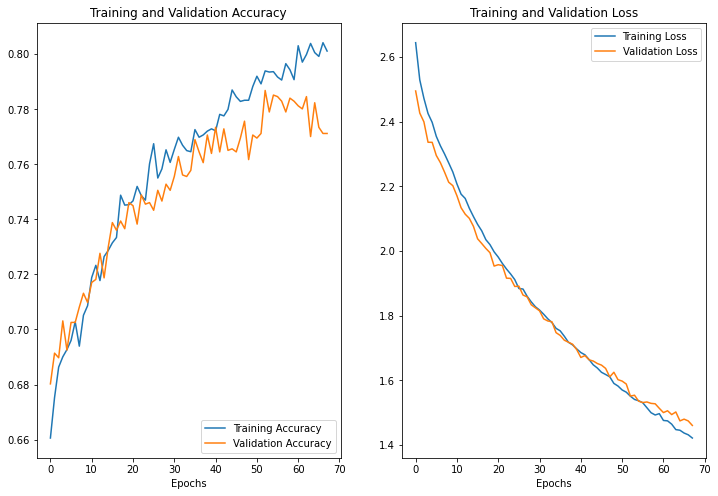

 60%|██████████████████████████████████████████████▊                               | 3/5 [5:05:04<3:18:49, 5964.97s/it]

 --- KFold Iteration 4 --- 
Epoch 1/150
226/226 [==============================] - 95s 417ms/step - loss: 2.6172 - accuracy: 0.6622 - val_loss: 2.4969 - val_accuracy: 0.6730
Epoch 2/150
226/226 [==============================] - 94s 416ms/step - loss: 2.4987 - accuracy: 0.6823 - val_loss: 2.4467 - val_accuracy: 0.6752
Epoch 3/150
226/226 [==============================] - 95s 418ms/step - loss: 2.4462 - accuracy: 0.6879 - val_loss: 2.4153 - val_accuracy: 0.6780
Epoch 4/150
226/226 [==============================] - 95s 418ms/step - loss: 2.4066 - accuracy: 0.6959 - val_loss: 2.3711 - val_accuracy: 0.6936
Epoch 5/150
226/226 [==============================] - 94s 416ms/step - loss: 2.3699 - accuracy: 0.7002 - val_loss: 2.3325 - val_accuracy: 0.6981
Epoch 6/150
226/226 [==============================] - 95s 418ms/step - loss: 2.3358 - accuracy: 0.7050 - val_loss: 2.2942 - val_accuracy: 0.6936
Epoch 7/150
226/226 [==============================] - 94s 417ms/step - loss: 2.2926 - accuracy:

Epoch Length        : 111
Model Accuracy      : 0.8673
Validation Accuracy : 0.7807


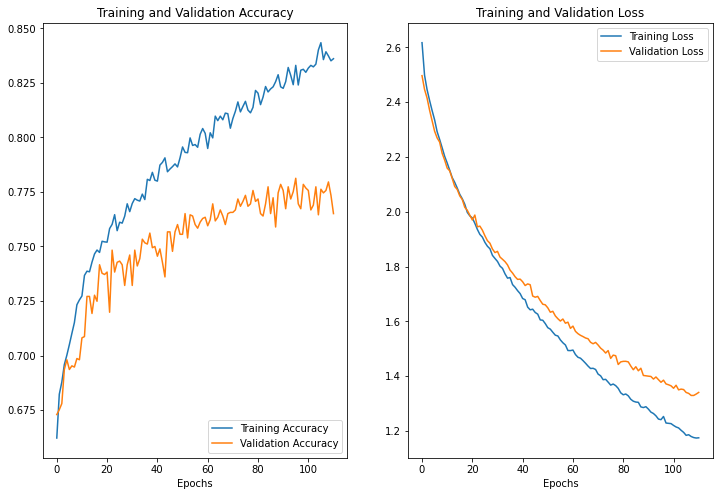

 80%|██████████████████████████████████████████████████████████████▍               | 4/5 [8:01:56<2:09:59, 7799.71s/it]

 --- KFold Iteration 5 --- 
Epoch 1/150
226/226 [==============================] - 103s 448ms/step - loss: 2.6067 - accuracy: 0.6582 - val_loss: 2.4898 - val_accuracy: 0.7070
Epoch 2/150
226/226 [==============================] - 101s 448ms/step - loss: 2.4897 - accuracy: 0.6855 - val_loss: 2.4372 - val_accuracy: 0.7070
Epoch 3/150
226/226 [==============================] - 101s 447ms/step - loss: 2.4406 - accuracy: 0.6836 - val_loss: 2.4042 - val_accuracy: 0.7121
Epoch 4/150
226/226 [==============================] - 101s 448ms/step - loss: 2.3866 - accuracy: 0.6963 - val_loss: 2.3914 - val_accuracy: 0.6987
Epoch 5/150
226/226 [==============================] - 101s 448ms/step - loss: 2.3594 - accuracy: 0.7020 - val_loss: 2.3485 - val_accuracy: 0.7165
Epoch 6/150
226/226 [==============================] - 101s 447ms/step - loss: 2.3331 - accuracy: 0.7017 - val_loss: 2.3152 - val_accuracy: 0.7188
Epoch 7/150
226/226 [==============================] - 101s 447ms/step - loss: 2.2946 - ac

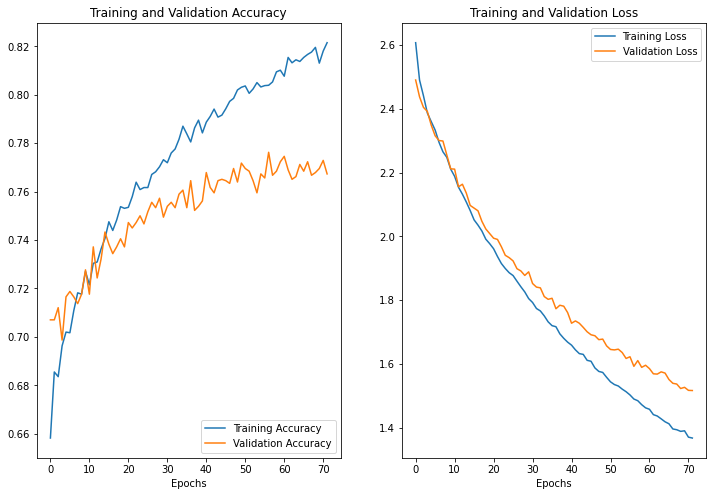

100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [10:05:27<00:00, 7265.58s/it]

 === KFOLD AVERAGE STATISTICS === 
loss: 1.385972762107849 - accuracy: 0.8366154313087464 - val_loss: 1.5333009958267212 - val_accuracy: 0.78125
Time Elapsed :  10:05:29.630406


In [32]:
'''
epochs = 150

start_time = time.time()

image_ds = tf.keras.preprocessing.image_dataset_from_directory(
    IMAGES_PATH_SEPARATED,
    image_size=IMG_SIZE,
    batch_size=32,
    shuffle=True
)

for images, labels in image_ds:
    model_input_shape = images.shape
    break
    
class_names = image_ds.class_names
num_classes = len(class_names)

statistics_data = [[],[],[],[]]

total_folds = 5 # 5
total_size = len(image_ds) 
fold_size = int(total_size / total_folds) 

if True:
    for i in tqdm(range(0, total_folds)): 
        print(" --- KFold Iteration {0} --- ".format(i+1))
        # split data looks strange but all it does 
        # it splits and shifts every iteration of the loop
        train_d_head = image_ds.take(i*fold_size)  
        rest_d = image_ds.skip(i*fold_size)
        test_d = rest_d.take(fold_size)
        train_d_tail = rest_d.skip(fold_size)
        train_d = train_d_head.concatenate(train_d_tail)
    
        # Prefetching overlaps data preprocessing and model execution while training. 
        # When model is performing training step, input pipeline is reading data for next step. 
        # This reduces each step time it takes for training and for reading.
        test_d = test_d.prefetch(buffer_size=32)
        train_d = train_d.prefetch(buffer_size=32)

        model = compile_model()
        fit_model(model, train_d, test_d, epochs, verbose=True, 
                  augment="kfold_{0}".format(i+1))

        # gather statistics
        train_evaluation = model.evaluate(train_d, verbose=0)
        validation_evaluation = model.evaluate(test_d, verbose=0)

        statistics_data[0].append(train_evaluation[0]) # loss
        statistics_data[1].append(train_evaluation[1]) # accuracy
        statistics_data[2].append(validation_evaluation[0]) # val_loss
        statistics_data[3].append(validation_evaluation[1]) # val_accuracy

    print(" === KFOLD AVERAGE STATISTICS === ")
    print("loss: {0} - accuracy: {1} - val_loss: {2} - val_accuracy: {3}".format(
        np.average(statistics_data[0]), np.average(statistics_data[1]),
        np.average(statistics_data[2]), np.average(statistics_data[3])
    ))
    print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))

''';

### === KFOLD AVERAGE STATISTICS === (TEST 1)
- loss: 1.385972762107849 
- accuracy: 0.8366154313087464 
- val_loss: 1.5333009958267212 
- val_accuracy: 0.78125
- Time Elapsed :  10:05:29.630406

### === KFOLD AVERAGE STATISTICS === (TEST 2)
- loss: 1.6093805313110352 
- accuracy: 0.8127683281898499 
- val_loss: 1.7153390645980835 
- val_accuracy: 0.7723214268684387
- Time Elapsed :  6:56:22.846047

## Test Data and Train Data Distribution Validation (for old KFold)
One of ways to increase model accuracy is to split test and train data in proportions similar to original dataset. Here is the proof that technique from deprecated KFold approach maintained proportions.

In [399]:
image_ds = tf.keras.preprocessing.image_dataset_from_directory(
        IMAGES_PATH_SEPARATED,
        image_size=IMG_SIZE,
        batch_size=32,
        shuffle=True
)
split = int(len(image_ds)*0.8)
train_d = image_ds.take(split)  
test_d = image_ds.skip(split)

Found 9013 files belonging to 7 classes.


## KFold

In [42]:
# Get names (ids) of images saved for validation
validation_image_names = []
for (dirpath, dirnames, _) in walk(IMAGES_PATH_VALIDATION):
    for dirname in dirnames:
        for (_, _, filenames) in walk(dirpath+dirname):
            for filename in filenames:
                validation_image_names.append(filename[:-4])

In [1]:
if False:
    # Measure time of KFold
    start_time = time.time()
    epochs = 15
    batch_size = 64
    generator = ImageDataGenerator()
    # Get data for images and labels
    images_df = pd.read_csv("../../Data/HAM10000_metadata.csv")
    images_df = images_df[["image_id","dx"]]
    
    # Remove ids that are in the list of images for validation
    images_df = images_df[~images_df.image_id.isin(validation_image_names)]     
    # Combine image_id with folder path and extention
    # images_df["image_id"] = images_df["dx"] + "/" + images_df["image_id"] + ".jpg"
    images_df["image_id"] = images_df["dx"] + "/" + images_df["image_id"] + ".jpg"
    
    # Perform KFold (Stratified ensures original data distribution)
    # Gather statistics
    kfold = StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
    statistics_data = [[],[],[],[]]
    
    for train_index, test_index in tqdm(kfold.split(images_df.image_id, images_df.dx)):
        training_data = images_df.iloc[train_index]
        testing_data  = images_df.iloc[test_index]

        training_set = generator.flow_from_dataframe(
                dataframe=training_data, directory=IMAGES_PATH_SEPARATED,
                x_col="image_id", y_col="dx",
                class_mode="categorical", shuffle=True,
                target_size=IMG_SIZE, batch_size=batch_size,
                validate_filenames=False)
        
        testing_set = generator.flow_from_dataframe(
                dataframe=testing_data, directory=IMAGES_PATH_SEPARATED,
                x_col="image_id", y_col="dx",
                class_mode="categorical", shuffle=True,
                target_size=IMG_SIZE, batch_size=batch_size,
                validate_filenames=False)
        
        #print(len(training_set), "training batches")
        #print(len(testing_set) , "testing batches")
        
        model = compile_model()
        fit_model(model, training_set, testing_set, epochs, verbose=True, 
                  augment="kfold_{0}".format(len(statistics_data[0])+1))
        
        # Gather statistics
        train_evaluation = model.evaluate(training_set, verbose=0)
        validation_evaluation = model.evaluate(testing_set, verbose=0)

        statistics_data[0].append(train_evaluation[0]) # loss
        statistics_data[1].append(train_evaluation[1]) # accuracy
        statistics_data[2].append(validation_evaluation[0]) # val_loss
        statistics_data[3].append(validation_evaluation[1]) # val_accuracy

    
    print(" === KFOLD AVERAGE STATISTICS === ")
    print("loss: {0} - accuracy: {1} - val_loss: {2} - val_accuracy: {3}".format(
        np.average(statistics_data[0]), np.average(statistics_data[1]),
        np.average(statistics_data[2]), np.average(statistics_data[3])
    ))
    print("Time Elapsed : ", timedelta(seconds=(time.time() - start_time)))
    
    '''
    ''';

## Load Existing Model

In [75]:
# skin_classifier_VGG16_25_ACC_74_VAL_71_good.keras
# skin_classifier_56_kfold_2.keras
# skin_classifier_56_ACC_81_VAL_80_ADAGRAD+MISH_good.keras

if True:
    model = keras.models.load_model(
        "output\keras_models\skin_classifier_VGG16_25_ACC_74_VAL_71_good.keras",
        custom_objects={"mish": mish}
    )
    model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_8 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_32 (Bat  (None, 100352)           401408    
 chNormalization)                                                
                                                                 
 dense_32 (Dense)            (None, 256)               25690368  
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                      

## Display Convolution Layer Filters

Filters     : 16
Kernel Size : (3, 3)


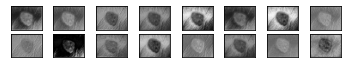

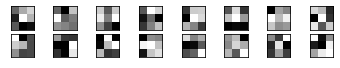

Filters     : 32
Kernel Size : (3, 3)


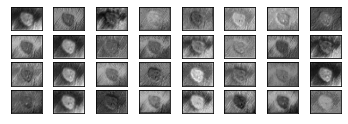

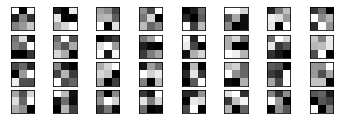

Filters     : 64
Kernel Size : (3, 3)


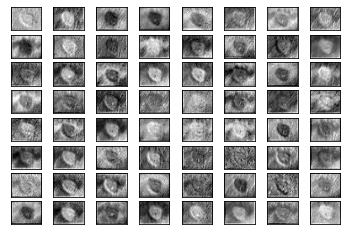

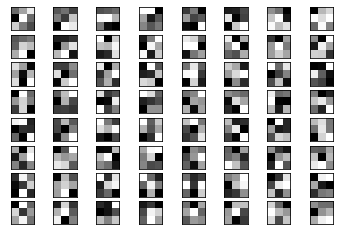

In [295]:
print_filters(model, plot_weights=True)

## Print Confusion Matrix
In this particulac example not a single time 'df' was predicted. Other models strugled with it as well. Idea of combining the models arised, based on multiple weak classifiers forming a stronger classifier in random forest. But ensembling the neural network models didn't work, it is speculated that overwhelming amount of 'nevi' class exapmles is shifting average weights.

Found 1002 files belonging to 7 classes.
Accuracy Score :  0.7545


,precision,sensitivity,specificity,f1-score,total
label,,,,,
akiec,0.5455,0.1818,0.9934,0.2727,33
bcc,0.4833,0.5686,0.9591,0.5225,51
bkl,0.6000,0.3818,0.9623,0.4667,110
df,0.0000,0.0000,1.0000,0.0000,12
mel,0.6875,0.1982,0.9866,0.3077,111
nv,0.7961,0.9657,0.3942,0.8727,671
vasc,0.6000,0.6429,0.9920,0.6207,14


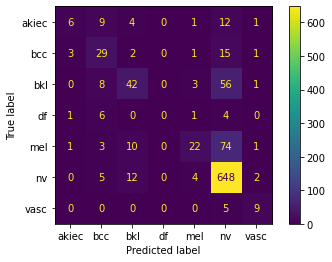

In [417]:
df_stats = print_confusion_matrix(model, IMAGES_PATH_VALIDATION)
df_stats

## Ensemble Multiple Models Weights
This approach is not working due to NV class is overrepresented

In [293]:
model_names = ["skin_classifier_96_kfold_1.keras",
               "skin_classifier_56_kfold_2.keras",
               "skin_classifier_68_kfold_3.keras",
               "skin_classifier_111_kfold_4.keras",
               "skin_classifier_72_kfold_5.keras"]
models = []
weights = [1/len(model_names) for _ in range(1, len(model_names)+1)]
for model_name in model_names:
    current_model = keras.models.load_model(
        ".\output\keras_models\\" + model_name, custom_objects={"mish": mish} )
    models.append(current_model)

# Get average weights from each layer from each model
avg_model_weights = list()
for layer in range( len(models[0].get_weights()) ):
    layer_weights = np.array([model.get_weights()[layer] for model in models])
    avg_layer_weights = np.average(layer_weights, axis=0, weights=weights)
    avg_model_weights.append(avg_layer_weights)

# ERROR:  Unknown activation function: mish. 
#         Please ensure this object is passed to the `custom_objects` argument.
# but clone_model does not support custom objects
#model_avg = keras.models.clone_model( models[0] ) #, custom_objects={"mish": mish} )

# Copy model architecture and apply average weights
model_avg = models[0]
model_avg.set_weights(avg_model_weights)
model_avg.compile(optimizer="Adagrad",
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=["accuracy"])

In [459]:
images_df

,image_id,dx
0,bkl/ISIC_0027419.jpg,bkl
2,bkl/ISIC_0026769.jpg,bkl
3,bkl/ISIC_0025661.jpg,bkl
4,bkl/ISIC_0031633.jpg,bkl
5,bkl/ISIC_0027850.jpg,bkl
...,...,...
10010,akiec/ISIC_0033084.jpg,akiec
10011,akiec/ISIC_0033550.jpg,akiec
10012,akiec/ISIC_0033536.jpg,akiec
10013,akiec/ISIC_0032854.jpg,akiec


Found 1002 files belonging to 7 classes.
Accuracy Score :  0.6697


,precision,sensitivity,specificity,f1-score,total
label,,,,,
akiec,0.0000,0.0,1.0,0.0000,33
bcc,0.0000,0.0,1.0,0.0000,51
bkl,0.0000,0.0,1.0,0.0000,110
df,0.0000,0.0,1.0,0.0000,12
mel,0.0000,0.0,1.0,0.0000,111
nv,0.6697,1.0,0.0,0.8022,671
vasc,0.0000,0.0,1.0,0.0000,14


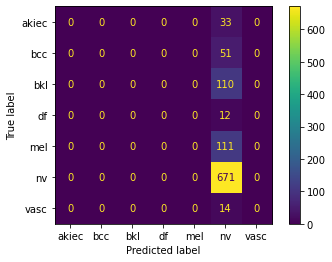

In [320]:
print_confusion_matrix(model_avg, IMAGES_PATH_VALIDATION)

Filters     : 16
Kernel Size : (3, 3)


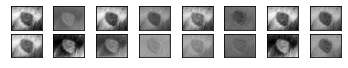

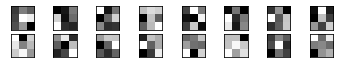

Filters     : 32
Kernel Size : (3, 3)


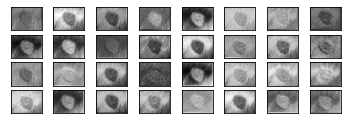

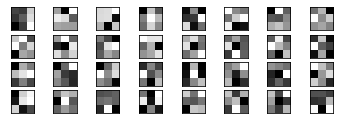

Filters     : 64
Kernel Size : (3, 3)


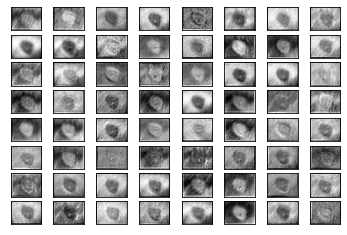

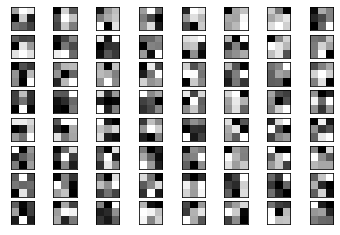

In [296]:
print_filters(model_avg, plot_weights=True)

In [ ]:
'''
Time it initially took to train a network was 462s per epoch
with reduction of image size and changing layers slightly it was down to 60s

Using batch size 32, as 64 overloads RAM on PC and it freezes

462s -> 458s
217s -> 219s    Images halfed
184s -> 186s  
125s -> 123s    Images quortered
166s -> 157s 
77s  -> 60s     Network simplified, 5 KFolds instead of 10 KFolds
44s  -> 40s     Added first layer

Here beta 1 with overfitting example graph
Reducing number of learning parameters, Dropout used
Looked at various loss and cost function, changed from Relu to Mish activation
At this stage Mish activation worked better than Relu, 
noticable difference in smoothness of training and in improvement of VAL_ACC
and reduction of overfitting
[Screenshots Graphs Available]

Noticed overfitting: Looking at regularization L1 and L2
Papers point to 0.005, tried various values, stayed at 0.005
Adding Dropout with 0.3

110s -> 100s 
85s  -> 78s

Changing learning rate, as model is not training over 70% ACC after regularization
Small improvements, removing Dropout layers to counter underfitting
0.0005  : Overfitting after VAL_ACC ~75 to 85 ACC
0.00001 : Way to small, 7 epochs no improvement ACC and VAL_ACC ~66 
0.0001  : Same 

Change Layers to improve accuracy, changed filter kernel size to 7-5-3 (from 3-3-3)

Still overfitting, now ACC ~95+ VAL ~81
Changing Dropout to 0.2 - 0.5 (0.4 chosen)

Swithing back to 3-3-3 kernel sizes.

Network is strugling to learn above 70 (with mish and L2 and Dropout)

Adding Batch Normalization Layer, several at the time, 
combined with few Conv layers then BN or each Conv layer with it's own,
as result removed 2 dropout layers 
as BN works better with several convolutions without dropout beforehand PROVE ME!!!

Tried to changed MaxPolling to AveragePolling, but went back as no advantages noticed

90s -> 89s

360s -> 359s

-> 90s

After changing learning rate it was noticed, 
that different learning rate works better on different epochs,
later epochs work better with larger learning rate, therefore Adagrad was implemented.

"Adagrad is an optimizer with parameter-specific learning rates, 
   which are adapted relative to how frequently a parameter gets updated during training."

Trying Adagrad + Mish 81/77 Not overfitted Good model, saved.  (Adam made it overfit)
Trying Adagrad + Relu ... worse

Proportions in Test/Train data are validated

Solutions Implemented to Improve Model:
1. Train/Test Data Proportion Validation
2. KFold Cross Validation
3. Hyperparameters Tuning (learning_rate, dropout_rate, regularization...)
4. Neural Network Ensemble
5. Batch Normalization
6. L1/L2 Regularization
7. Different Activation Functions (relu, mish, swish)
8. Different Optimizers (adam, adagrad)


NEXT : Transfer Learning  VGG16 vs ResNet50
ResourceExhaustedError: Failed to allocate memory for the batch of component 0 [Op:IteratorGetNext]

EDA: resize rotate crop

VGG16 first try overfitted with 50 and 20 units in Dense layers
    trying bigger values for units 4096,4096
    
Epoch 6/50
544s 5s/step - loss: 0.3679 - accuracy: 0.8554 - val_loss: 1.2280 - val_accuracy: 0.7275

After units set to 4096,4096 even more overfitted at the first epoch

Epoch 1/50
534s 5s/step - loss: 0.3472 - accuracy: 0.8622 - val_loss: 1.2793 - val_accuracy: 0.7247

Tweaking params, adding BatchNormalization
Changed BatchNormalization momentum=0.99 + added Normalization Layer

Changed BatchNormalization momentum=0.9, Normalization Layer, Dense 64-> Dense 32
600s epoch, starting result looks similar.

ResNet50 first run looks the same as VGG16, it looks overfitted...

Normalization techniques applied to transfer learning (BatchNormalization and DropOut)
Using RMSprop optimizer, 10 epoch models seem promising. Needs full testing.

With the original model getting changed with different layers it was decided to check Optimizers again.
This time Adam shown good results, but loss and validation loss aplitude is high (Adam Adagrad ResNet). 
Looks like behaviour depends not only on particular dataset but also on particulat model structure.

HERE Table is gathered and compiled with results of different parameter combinations
Functions are moved to separate file.

Tried GRAYSCALE, no improvement in accuracy
GridSearchCV and RandomSearchCV would be too slow as single run can take around 6 hours
Trying 2 or 5 classes instead of 7 did not show increased accuracy

Threshold approach used to cut noise out of images, did not improve accuracy
Looking at top k accuracy to compare models, shuffle on test data set to False, to have same results.


///
''';